This notebook shows line intensity variation along the SUMER slit. 
Links to [Figure B1](#figureb1).

(The internal hyperlink only works on [nbviewer](https://nbviewer.org). Do not click when viewing the notebook on GitHub.)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
import corner
import mycorner
importlib.reload(mycorner)
from sumerpy import con_width_funct_4, radiometry
from matplotlib.colors import LinearSegmentedColormap
import cmcrameri.cm as cmcm

In [2]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_338 = np.linspace(0,1023,1024)*0.04496629878144223 + 671.7967194748996
sumer_338_window = sumer_img[:,:1024]
wvl_375 = np.linspace(0,1023,1024)*0.044790246422816475 + 745.655738274089
sumer_375_window = sumer_img[:,1024:2048]
wvl_509 = np.linspace(0,1023,1024)*0.04381162280734919 + 1015.1032588901901
sumer_509_window = sumer_img[:,2048:3072]
wvl_607 = np.linspace(0,1023,1024)*0.04316670824233466 + 1209.3346601414057
sumer_607_window = sumer_img[:,3072:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


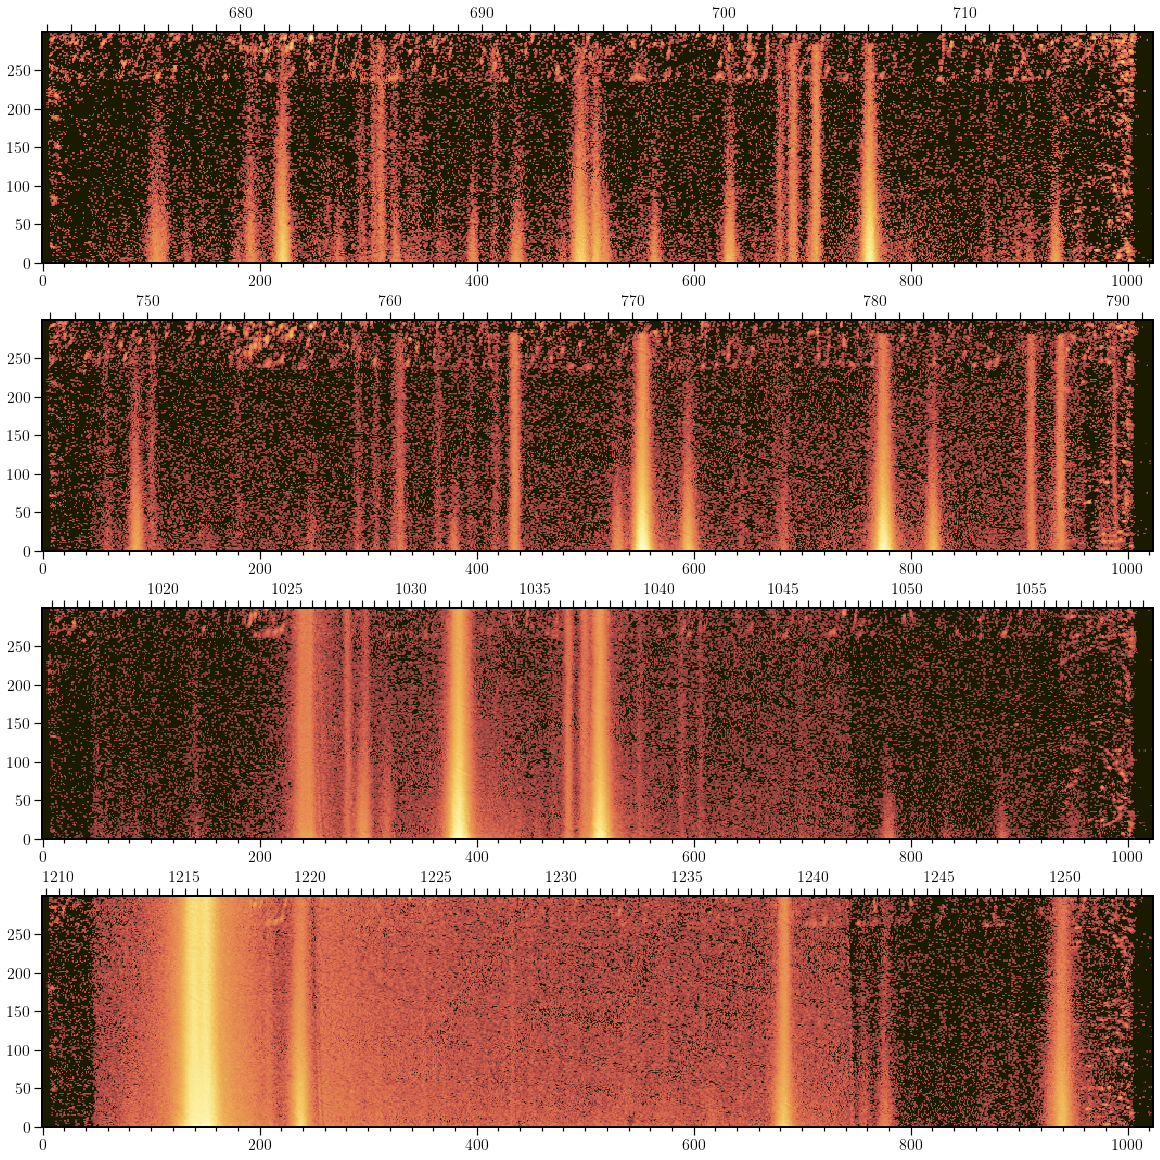

In [3]:
fig, axes = plt.subplots(4,1,figsize=(16,16),constrained_layout=True)

axes[0].pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_338_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[1].pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_375_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[2].pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_509_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[3].pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_607_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)


for ax_, wvl_array in zip(axes, (wvl_338,wvl_375,wvl_509,wvl_607)):
    ax_wvl = ax_.twiny()
    ax_wvl.set_xlim(wvl_array[0],wvl_array[-1])
    ax_.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_.tick_params(labelsize=16)
    ax_wvl.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_wvl.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)
    ax_wvl.tick_params(which="minor",width=1.2,length=8)

In [4]:
OIII_703_slice = slice(670,700)
wvl_OIII_703 = wvl_338[OIII_703_slice]
radiometry_OIII_703 = radiometry(1,wvl_OIII_703,1,np.ones_like(wvl_OIII_703),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_OIII_703 = np.average(sumer_338_window[100:,OIII_703_slice].reshape(-1,10,OIII_703_slice.stop - OIII_703_slice.start),axis=1)*radiometry_OIII_703
err_OIII_703 = np.sqrt(np.sum(300*sumer_338_window[100:,OIII_703_slice].reshape(-1,10,OIII_703_slice.stop - OIII_703_slice.start),
                        axis=1))/30/300*radiometry_OIII_703

OIII_703_fit_model = SpectrumFitRow(data=int_OIII_703,wvl=wvl_OIII_703,err=err_OIII_703, line_number=2,
                    line_wvl_init=[702.3,702.85],int_max_init=[0.1,0.2],fwhm_init=[0.05,0.05],same_width=False)
OIII_703_fit_model.run_lse()

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

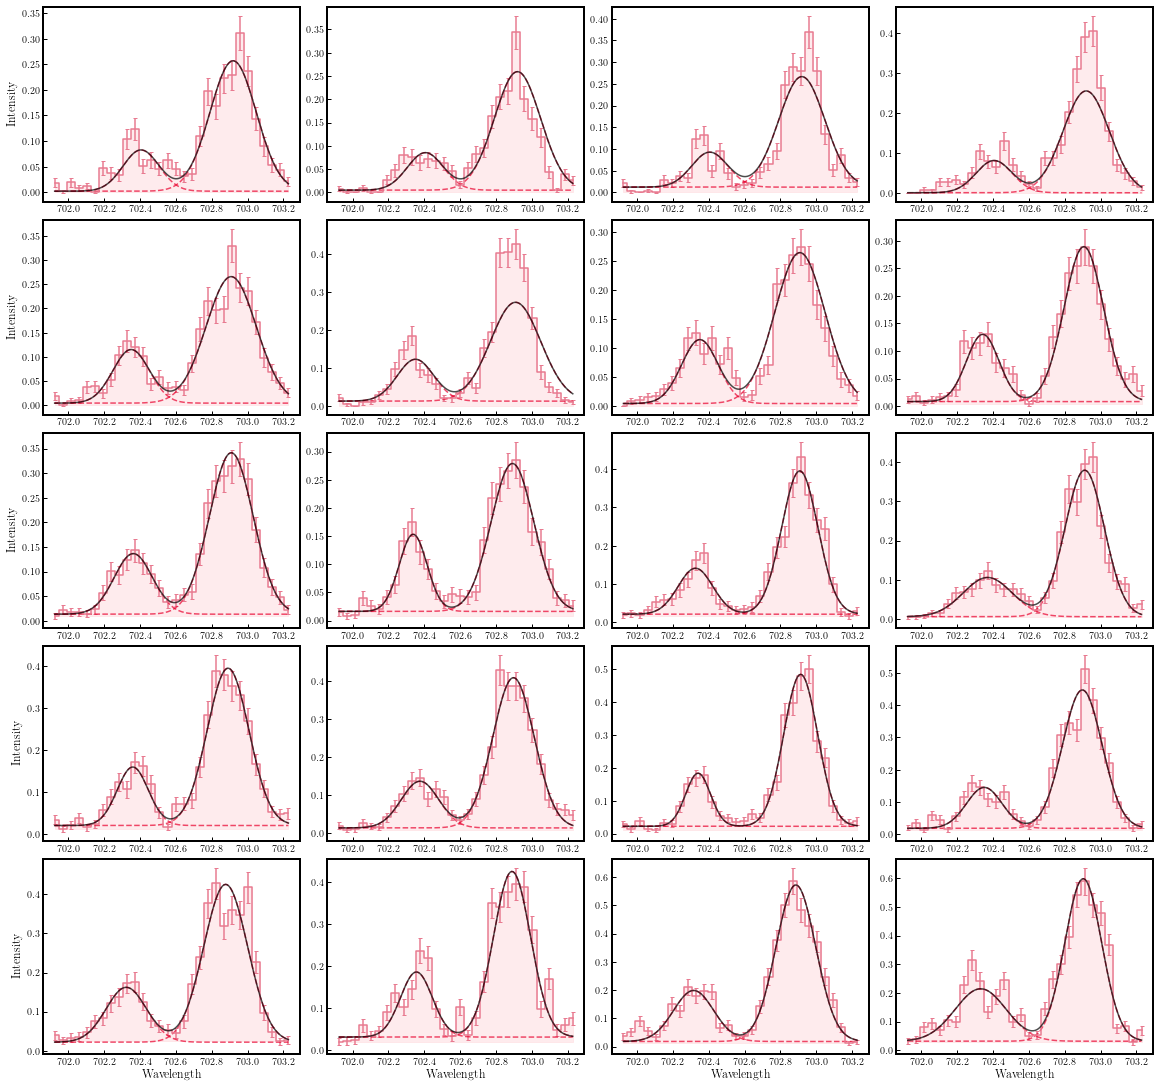

In [5]:
OIII_703_fit_model.plot_fit()

<AxesSubplot:ylabel='Total Intensity $I_0$'>

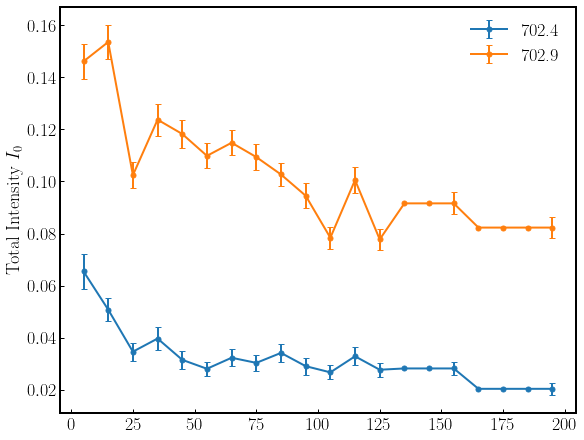

In [6]:
OIII_703_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [7]:
OV_760_slice = slice(315,345)
wvl_OV_760 = wvl_375[OV_760_slice]
radiometry_OV_760 = radiometry(1,wvl_OV_760,1,np.ones_like(wvl_OV_760),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_OV_760 = np.average(sumer_375_window[100:,OV_760_slice].reshape(-1,10,OV_760_slice.stop - OV_760_slice.start),axis=1)*radiometry_OV_760
err_OV_760 = np.sqrt(np.sum(300*sumer_375_window[100:,OV_760_slice].reshape(-1,10,OV_760_slice.stop - OV_760_slice.start),
                        axis=1))/30/300*radiometry_OV_760

OV_760_fit_model = SpectrumFitRow(data=int_OV_760,wvl=wvl_OV_760,err=err_OV_760, line_number=1,
                    line_wvl_init=[760.4],int_max_init=[0.1],fwhm_init=[0.2],same_width=True,mask=[[759.97,760.25]])
OV_760_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

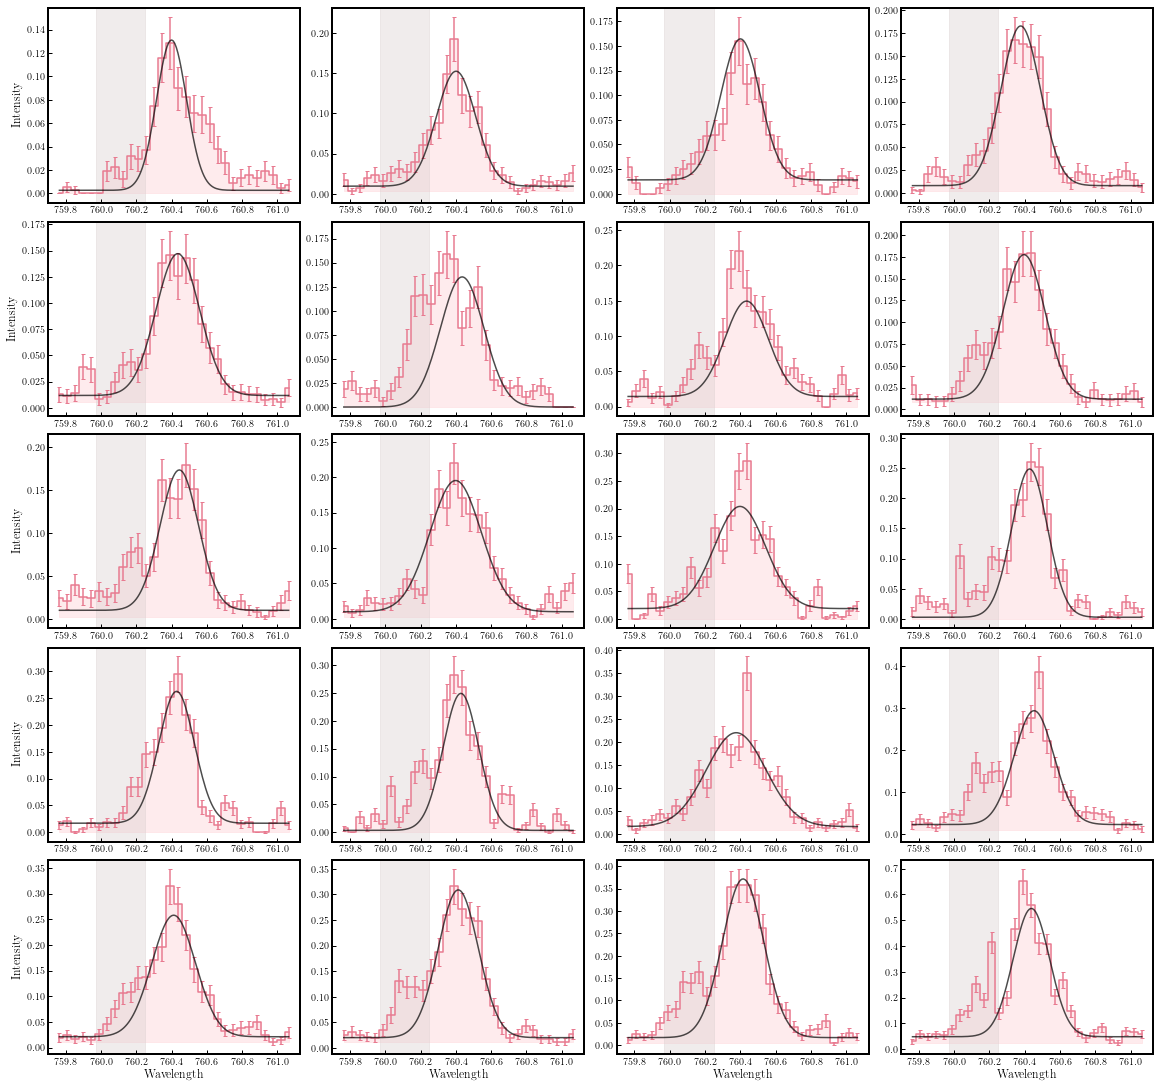

In [8]:
OV_760_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

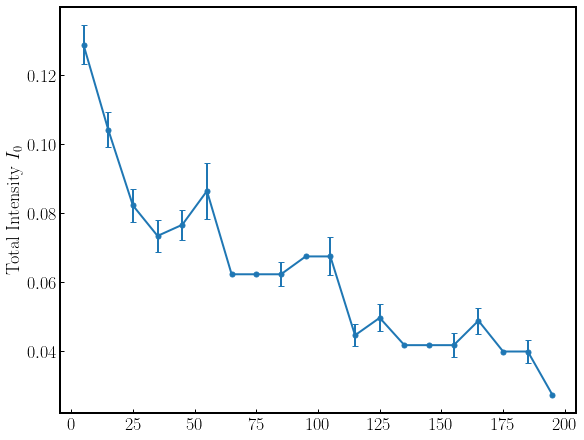

In [9]:
OV_760_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [10]:
NIV_765_slice = slice(425,450)
wvl_NIV_765 = wvl_375[NIV_765_slice]
radiometry_NIV_765 = radiometry(1,wvl_NIV_765,1,np.ones_like(wvl_NIV_765),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_NIV_765 = np.average(sumer_375_window[100:,NIV_765_slice].reshape(-1,10,NIV_765_slice.stop - NIV_765_slice.start),axis=1)*radiometry_NIV_765
err_NIV_765 = np.sqrt(np.sum(300*sumer_375_window[100:,NIV_765_slice].reshape(-1,10,NIV_765_slice.stop - NIV_765_slice.start),
                        axis=1))/30/300*radiometry_NIV_765

NIV_765_fit_model = SpectrumFitRow(data=int_NIV_765,wvl=wvl_NIV_765,err=err_NIV_765, line_number=1,
                    line_wvl_init=[765.15],int_max_init=[0.7],fwhm_init=[0.2],same_width=True)
NIV_765_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

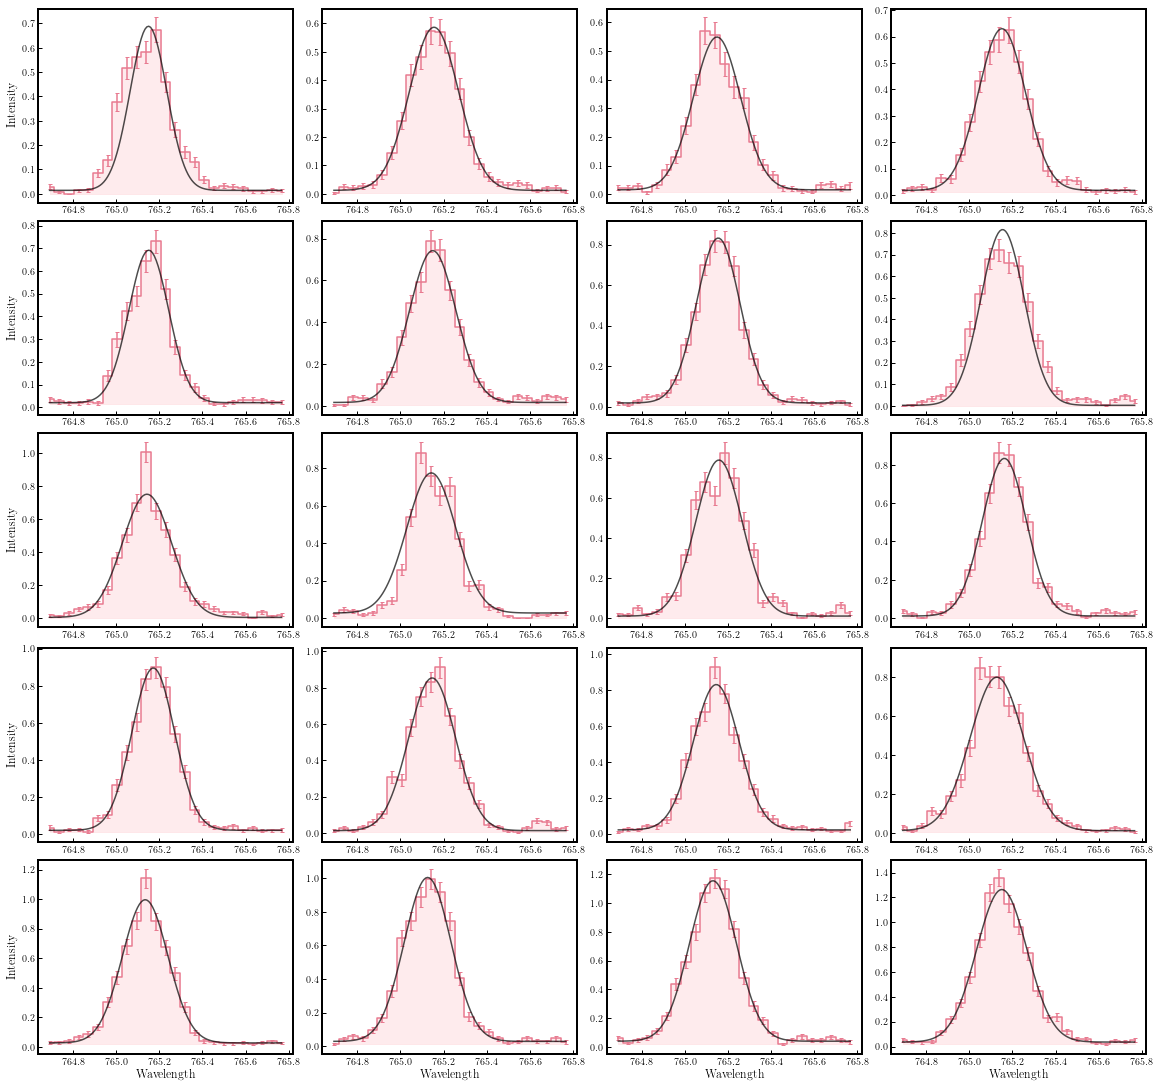

In [11]:
NIV_765_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

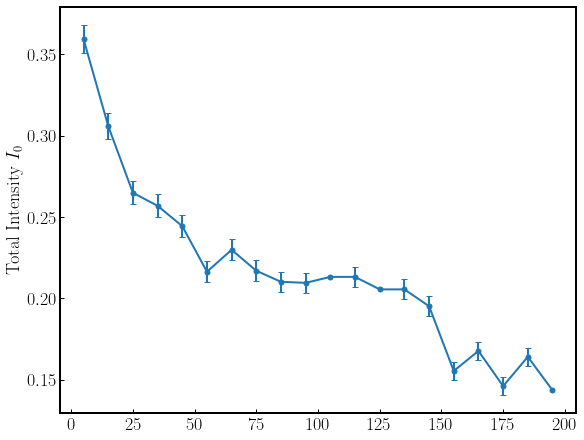

In [12]:
NIV_765_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [13]:
SV_786_slice = slice(900,925)
wvl_SV_786 = wvl_375[SV_786_slice]
radiometry_SV_786 = radiometry(1,wvl_SV_786,1,np.ones_like(wvl_SV_786),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_SV_786 = np.average(sumer_375_window[100:,SV_786_slice].reshape(-1,10,SV_786_slice.stop - SV_786_slice.start),axis=1)*radiometry_SV_786
err_SV_786 = np.sqrt(np.sum(300*sumer_375_window[100:,SV_786_slice].reshape(-1,10,SV_786_slice.stop - SV_786_slice.start),
                        axis=1))/30/300*radiometry_SV_786

SV_786_fit_model = SpectrumFitRow(data=int_SV_786,wvl=wvl_SV_786,err=err_SV_786, line_number=1,
                    line_wvl_init=[786.5],int_max_init=[0.4],fwhm_init=[0.2],same_width=True)
SV_786_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

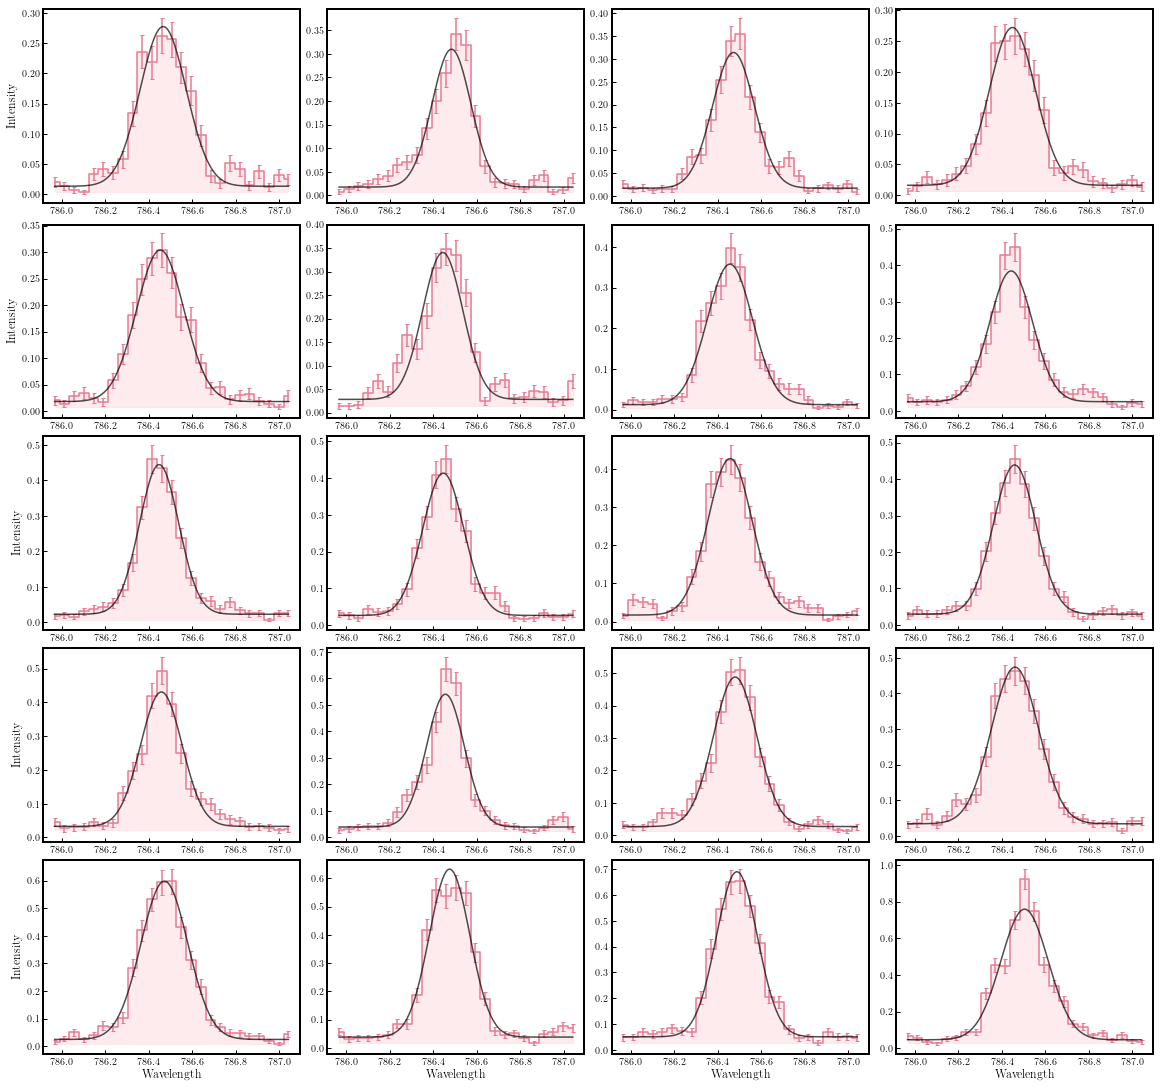

In [14]:
SV_786_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

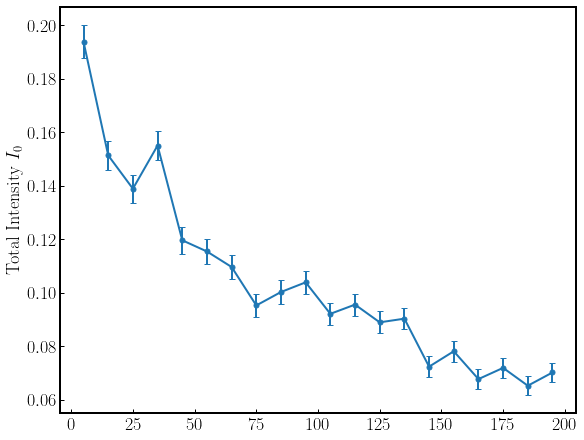

In [15]:
SV_786_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [16]:
OIV_787_slice = slice(925,960)
wvl_OIV_787 = wvl_375[OIV_787_slice]
radiometry_OIV_787 = radiometry(1,wvl_OIV_787,1,np.ones_like(wvl_OIV_787),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_OIV_787 = np.average(sumer_375_window[100:,OIV_787_slice].reshape(-1,10,OIV_787_slice.stop - OIV_787_slice.start),axis=1)*radiometry_OIV_787
err_OIV_787 = np.sqrt(np.sum(300*sumer_375_window[100:,OIV_787_slice].reshape(-1,10,OIV_787_slice.stop - OIV_787_slice.start),
                        axis=1))/30/300*radiometry_OIV_787

OIV_787_fit_model = SpectrumFitRow(data=int_OIV_787,wvl=wvl_OIV_787,err=err_OIV_787, line_number=1,
                    line_wvl_init=[787.7],int_max_init=[0.4],fwhm_init=[0.2],same_width=True,mask=[[787.25,787.45]])
OIV_787_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

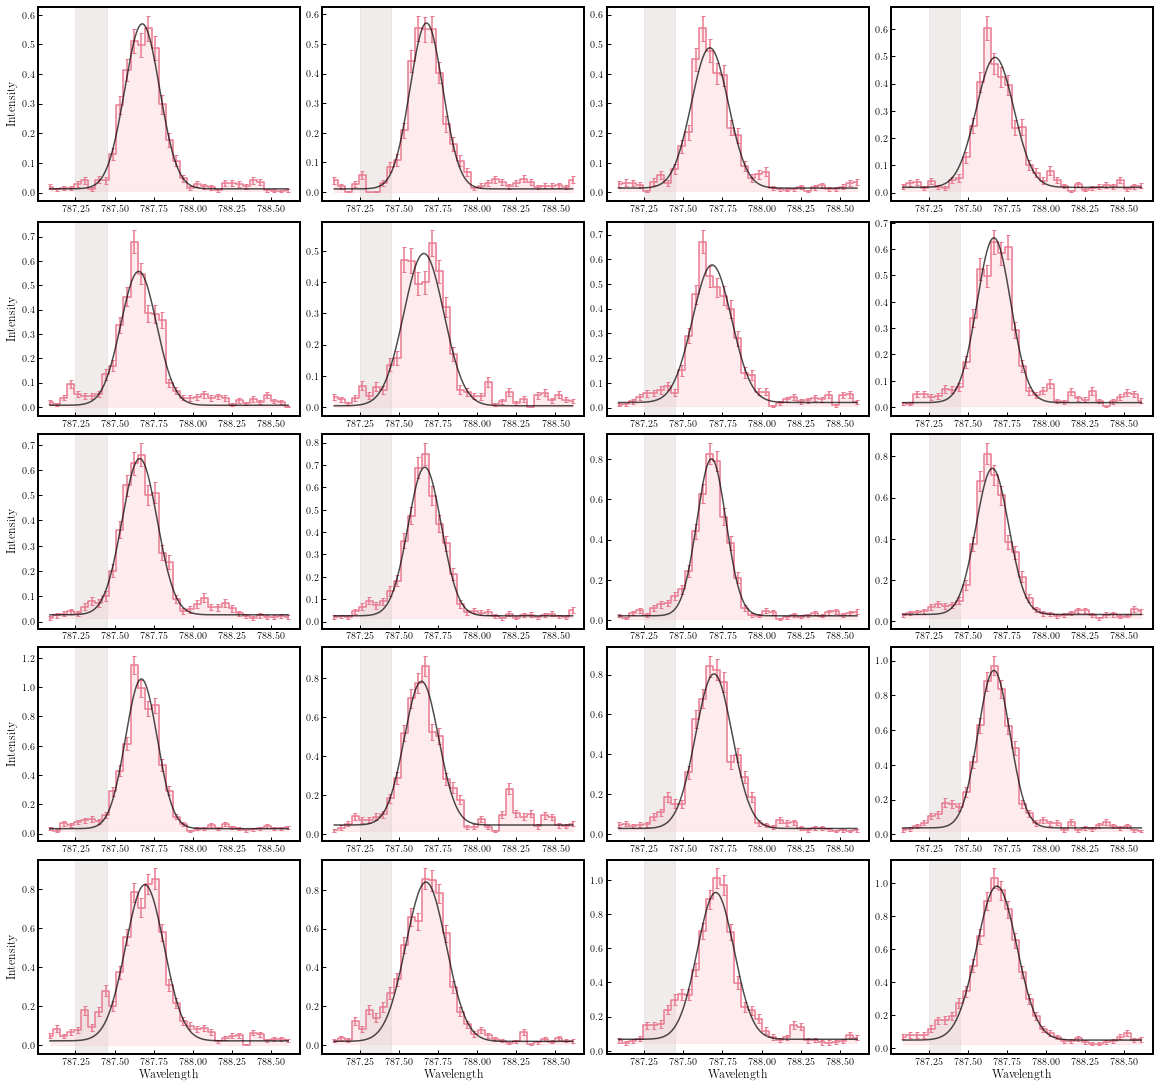

In [17]:
OIV_787_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

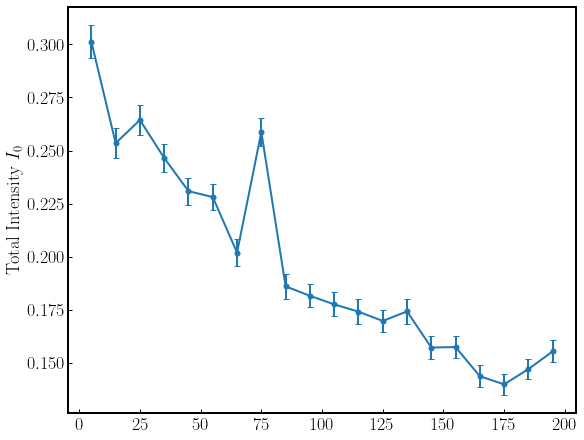

In [18]:
OIV_787_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [19]:
Lybeta_slice = slice(200,270)
wvl_Lybeta = wvl_509[Lybeta_slice]
radiometry_Lybeta = radiometry(1,wvl_Lybeta,1,np.ones_like(wvl_Lybeta),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_Lybeta = np.average(sumer_509_window[100:,Lybeta_slice].reshape(-1,10,Lybeta_slice.stop - Lybeta_slice.start),axis=1)*radiometry_Lybeta
err_Lybeta = np.sqrt(np.sum(300*sumer_509_window[100:,Lybeta_slice].reshape(-1,10,Lybeta_slice.stop - Lybeta_slice.start),
                        axis=1))/30/300*radiometry_Lybeta

Lybeta_fit_model = SpectrumFitRow(data=int_Lybeta,wvl=wvl_Lybeta,err=err_Lybeta, line_number=1,
                    line_wvl_init=[1025.7],int_max_init=[1],fwhm_init=[1],same_width=True,mask=[[1026.2,1027]])
Lybeta_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

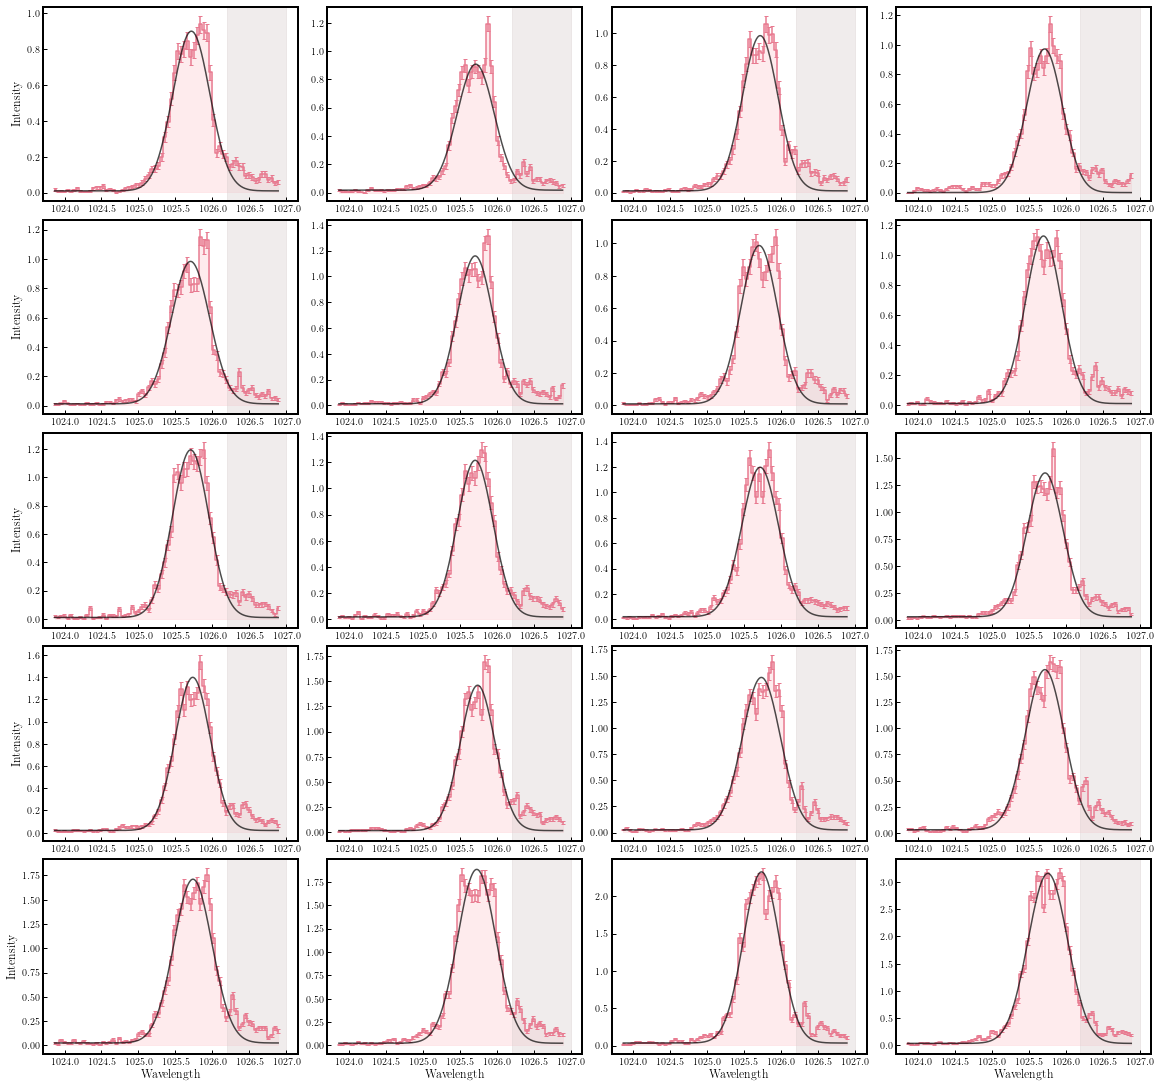

In [20]:
Lybeta_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

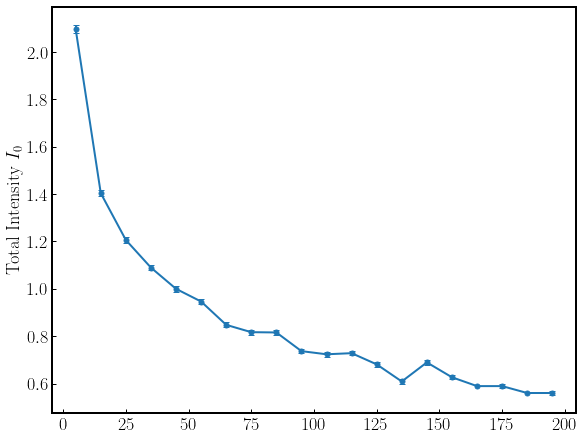

In [21]:
Lybeta_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [22]:
OI_1027_slice = slice(270,290)
wvl_OI_1027 = wvl_509[OI_1027_slice]
radiometry_OI_1027 = radiometry(1,wvl_OI_1027,1,np.ones_like(wvl_OI_1027),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_OI_1027 = np.average(sumer_509_window[100:,OI_1027_slice].reshape(-1,10,OI_1027_slice.stop - OI_1027_slice.start),axis=1)*radiometry_OI_1027
err_OI_1027 = np.sqrt(np.sum(300*sumer_509_window[100:,OI_1027_slice].reshape(-1,10,OI_1027_slice.stop - OI_1027_slice.start),
                        axis=1))/30/300*radiometry_OI_1027

OI_1027_fit_model = SpectrumFitRow(data=int_OI_1027,wvl=wvl_OI_1027,err=err_OI_1027, line_number=1,
                    line_wvl_init=[1027.42],int_max_init=[0.2],fwhm_init=[0.2],same_width=True,mask=[[1027.6,1027.77]])
OI_1027_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

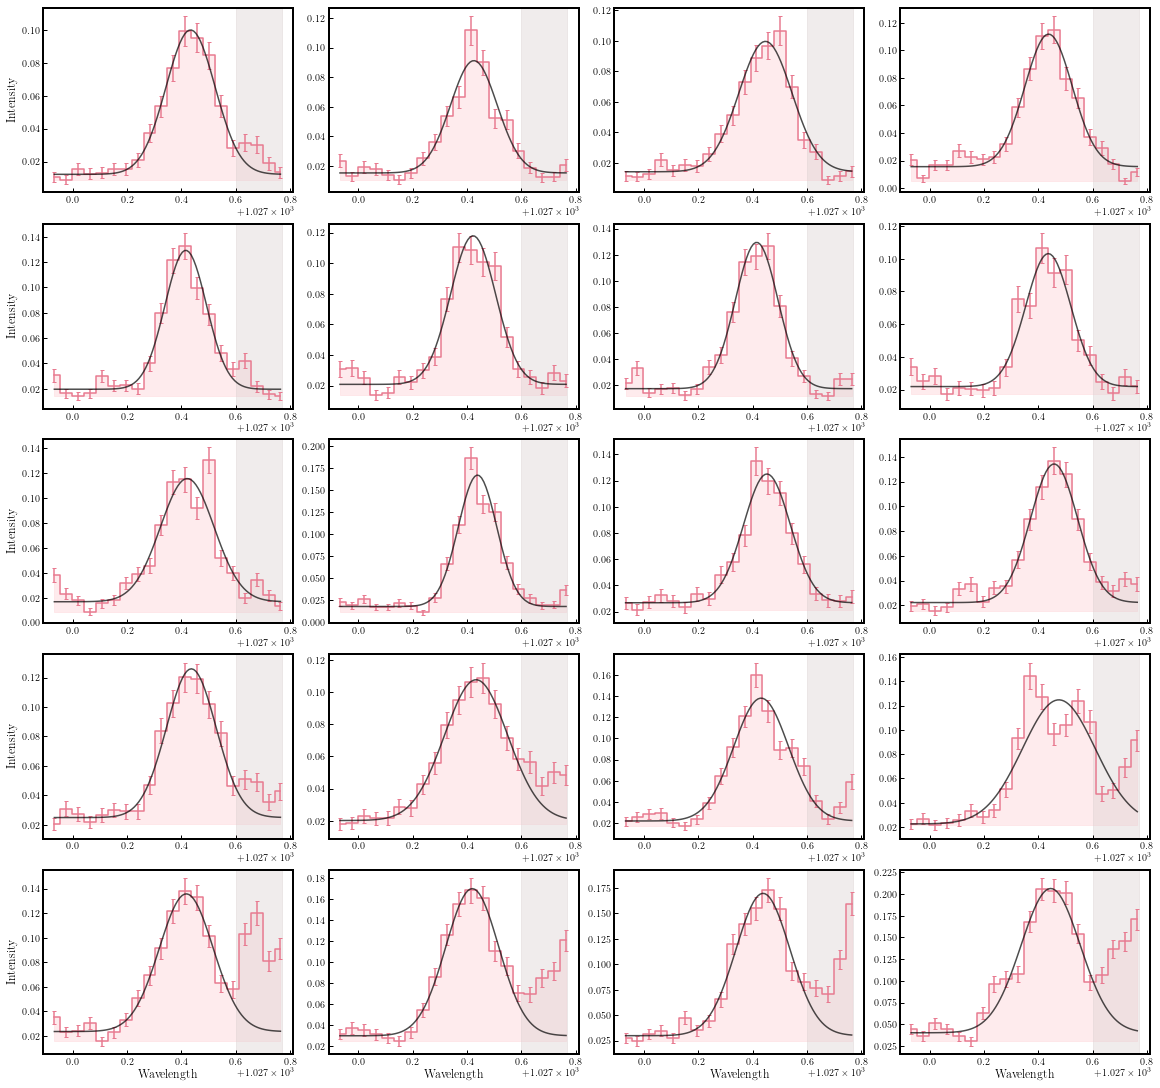

In [23]:
OI_1027_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

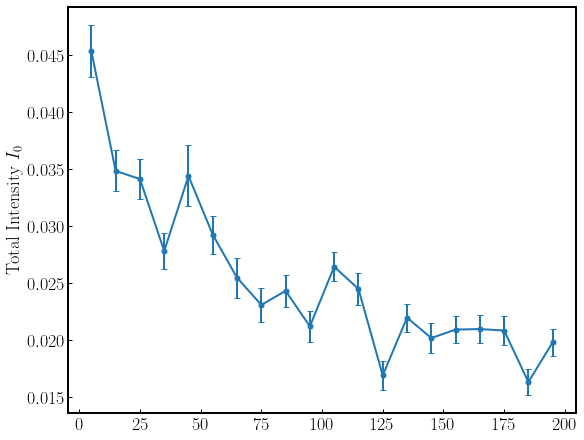

In [24]:
OI_1027_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [25]:
CII_1036_slice = slice(470,490)
wvl_CII_1036 = wvl_509[CII_1036_slice]
radiometry_CII_1036 = radiometry(1,wvl_CII_1036,1,np.ones_like(wvl_CII_1036),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_CII_1036 = np.average(sumer_509_window[100:,CII_1036_slice].reshape(-1,10,CII_1036_slice.stop - CII_1036_slice.start),axis=1)*radiometry_CII_1036
err_CII_1036 = np.sqrt(np.sum(300*sumer_509_window[100:,CII_1036_slice].reshape(-1,10,CII_1036_slice.stop - CII_1036_slice.start),
                        axis=1))/30/300*radiometry_CII_1036

CII_1036_fit_model = SpectrumFitRow(data=int_CII_1036,wvl=wvl_CII_1036,err=err_CII_1036, line_number=1,
                    line_wvl_init=[1036.3],int_max_init=[0.4],fwhm_init=[0.2],same_width=True)
CII_1036_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

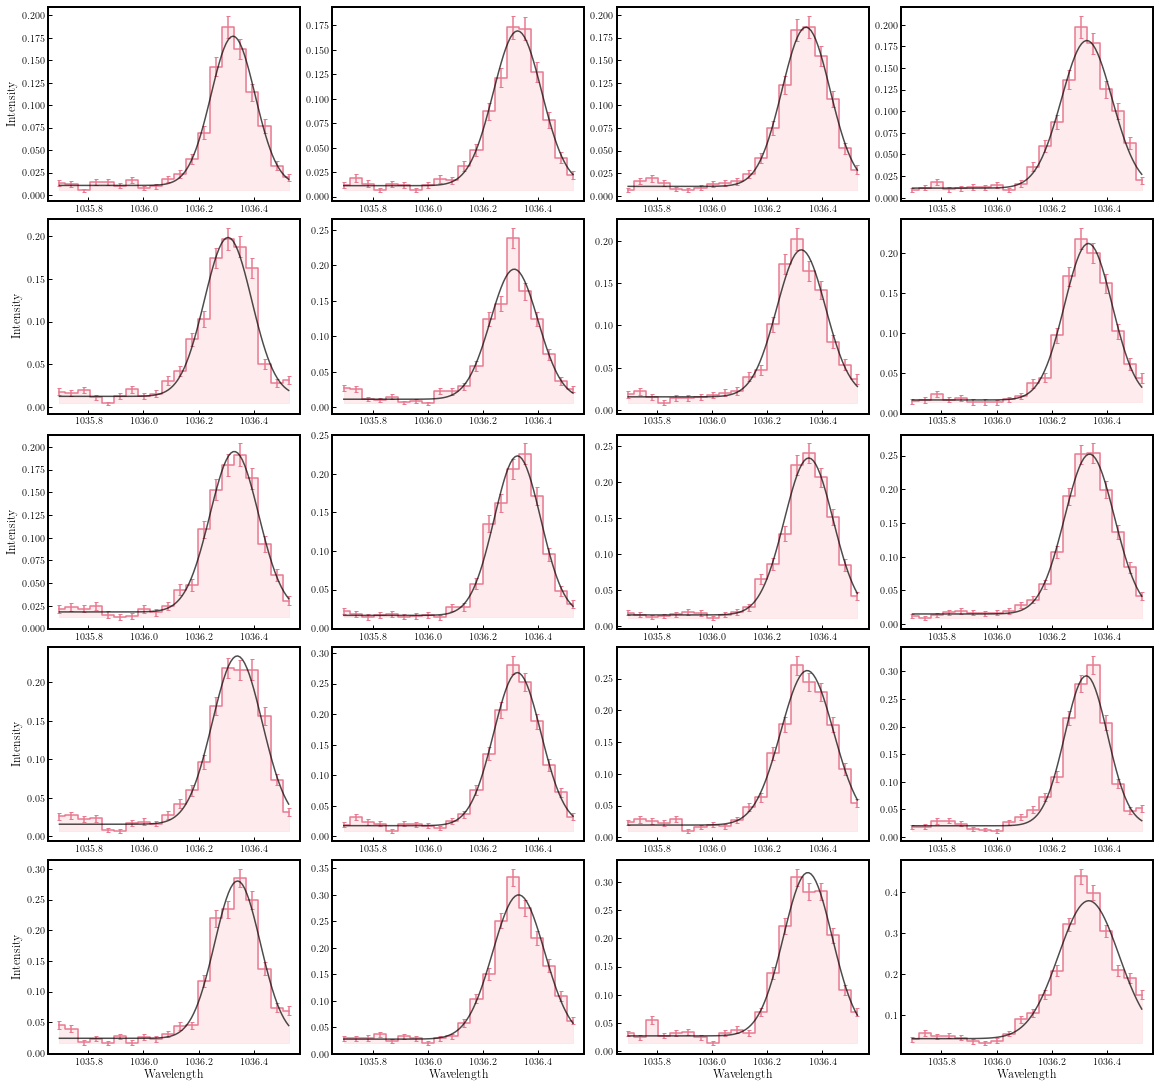

In [26]:
CII_1036_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

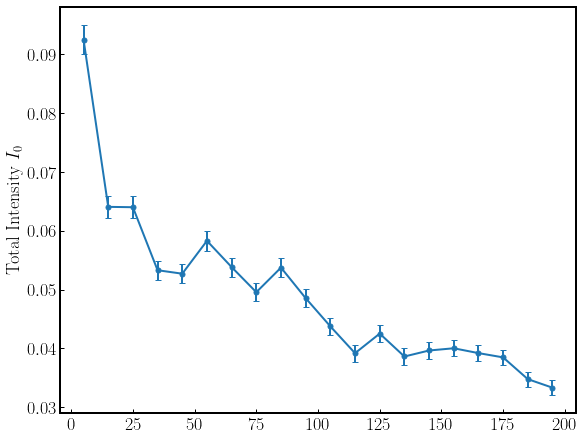

In [27]:
CII_1036_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [28]:
Lyalpha_slice = slice(100,200)
wvl_Lyalpha = wvl_607[Lyalpha_slice]
radiometry_Lyalpha = radiometry(1,wvl_Lyalpha,1,np.ones_like(wvl_Lyalpha),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_Lyalpha = np.average(sumer_607_window[100:,Lyalpha_slice].reshape(-1,10,Lyalpha_slice.stop - Lyalpha_slice.start),axis=1)*radiometry_Lyalpha
err_Lyalpha = np.sqrt(np.sum(300*sumer_607_window[100:,Lyalpha_slice].reshape(-1,10,Lyalpha_slice.stop - Lyalpha_slice.start),
                        axis=1))/30/300*radiometry_Lyalpha

Lyalpha_fit_model = SpectrumFitRow(data=int_Lyalpha,wvl=wvl_Lyalpha,err=err_Lyalpha, line_number=1,
                    line_wvl_init=[1216],int_max_init=[2],fwhm_init=[1],same_width=True)
Lyalpha_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

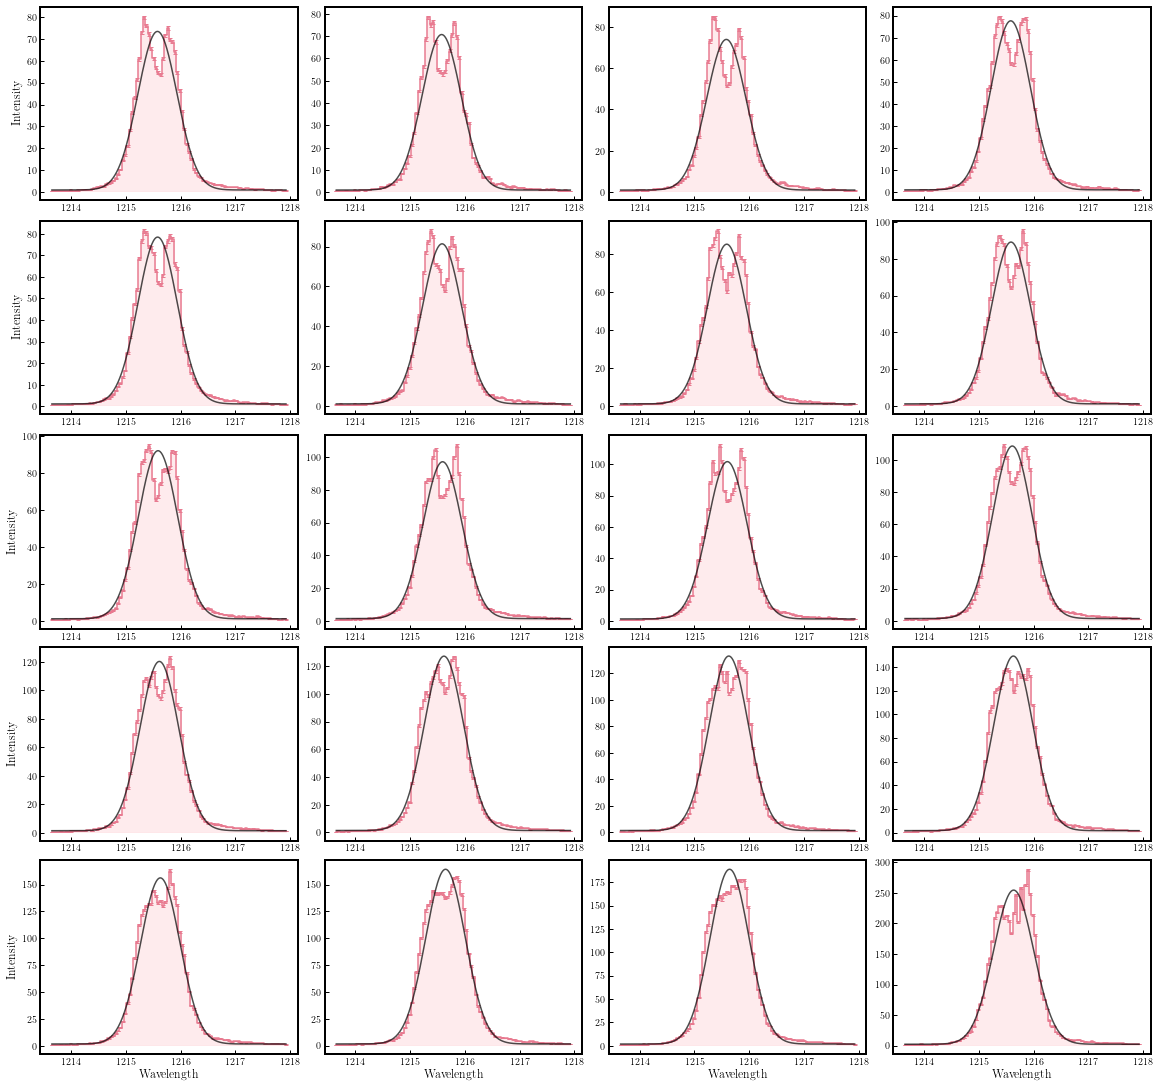

In [29]:
Lyalpha_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

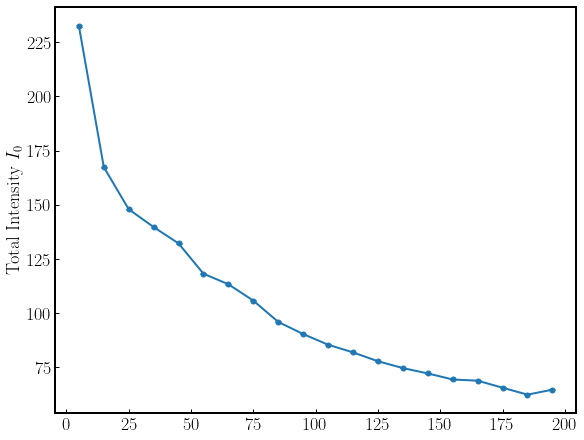

In [30]:
Lyalpha_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

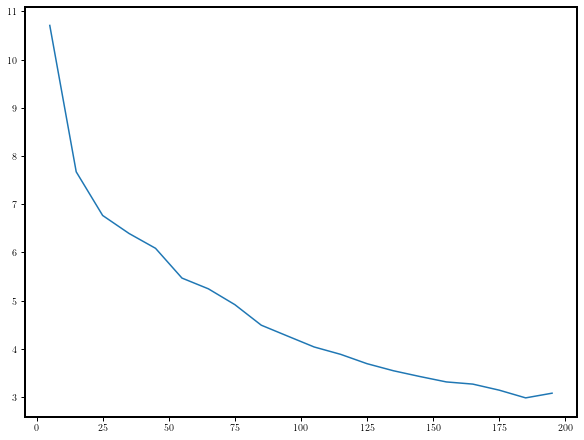

In [31]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
ax.plot(np.arange(195,-1,-10), np.sum((wvl_607[1] - wvl_607[0])*sumer_607_window[100:,Lyalpha_slice].reshape(-1,10,Lyalpha_slice.stop - Lyalpha_slice.start),
                        axis=(1,2)))

In [32]:
NV_1238_slice = slice(660,710)
wvl_NV_1238 = wvl_607[NV_1238_slice]
radiometry_NV_1238 = radiometry(1,wvl_NV_1238,1,np.ones_like(wvl_NV_1238),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_NV_1238 = np.average(sumer_607_window[100:,NV_1238_slice].reshape(-1,10,NV_1238_slice.stop - NV_1238_slice.start),axis=1)*radiometry_NV_1238
err_NV_1238 = np.sqrt(np.sum(300*sumer_607_window[100:,NV_1238_slice].reshape(-1,10,NV_1238_slice.stop - NV_1238_slice.start),
                        axis=1))/30/300*radiometry_NV_1238

NV_1238_fit_model = SpectrumFitRow(data=int_NV_1238,wvl=wvl_NV_1238,err=err_NV_1238, line_number=1,
                    line_wvl_init=[1238.8],int_max_init=[0.7],fwhm_init=[0.2],same_width=True)
NV_1238_fit_model.run_lse()

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>]], dtype=object)

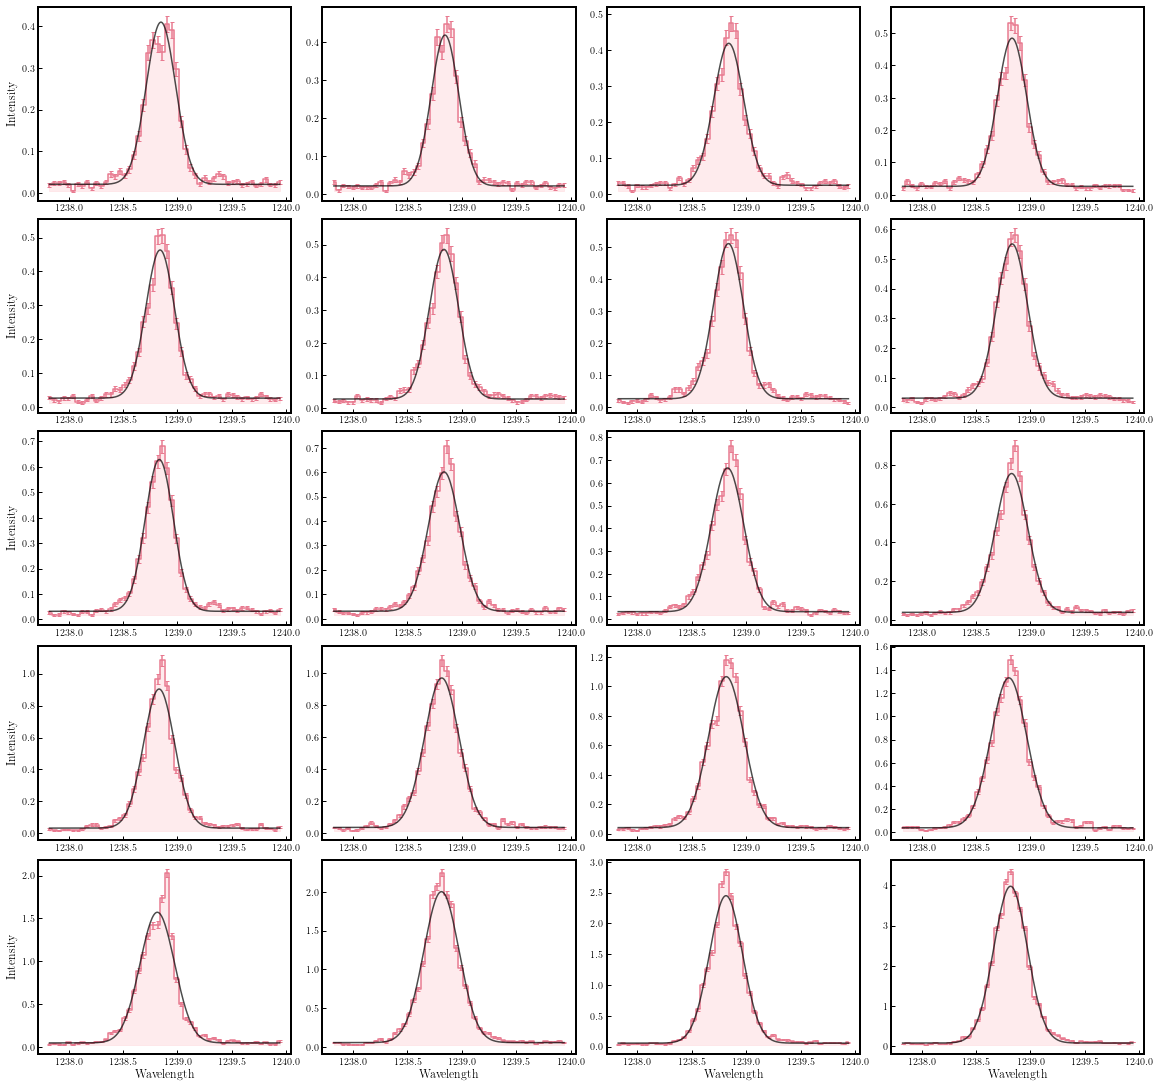

In [33]:
NV_1238_fit_model.plot_fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

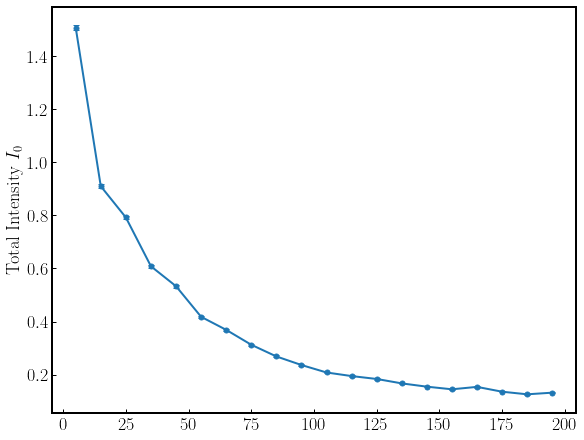

In [34]:
NV_1238_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [35]:
NeVIII_770_slice = slice(540,570)
wvl_NeVIII_770 = wvl_375[NeVIII_770_slice]
radiometry_NeVIII_770 = radiometry(1,wvl_NeVIII_770,1,np.ones_like(wvl_NeVIII_770),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_NeVIII_770 = np.average(sumer_375_window[100:,NeVIII_770_slice].reshape(-1,10,NeVIII_770_slice.stop - NeVIII_770_slice.start),axis=1)*radiometry_NeVIII_770
err_NeVIII_770 = np.sqrt(np.sum(300*sumer_375_window[100:,NeVIII_770_slice].reshape(-1,10,NeVIII_770_slice.stop - NeVIII_770_slice.start),
                        axis=1))/30/300*radiometry_NeVIII_770

NeVIII_770_fit_model = SpectrumFitRow(data=int_NeVIII_770,wvl=wvl_NeVIII_770,err=err_NeVIII_770, line_number=1,
                    line_wvl_init=[770.4],int_max_init=[1],fwhm_init=[0.3],same_width=True)
NeVIII_770_fit_model.run_lse()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Total Intensity $I_0$'>

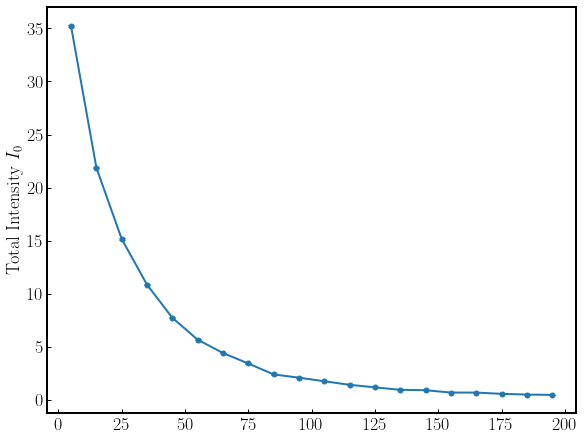

In [36]:
NeVIII_770_fit_model.plot_variation(var="int",xdata=np.arange(195,-1,-10))

In [37]:
def normalize_int_err(int,err):
    int_norm = int[4:]/np.nanmean(int[4:5])
    int_err_norm = err[4:]/np.nanmean(int[4:5])

    return int_norm, int_err_norm


### Figure B1
<a id='figureb1'></a>

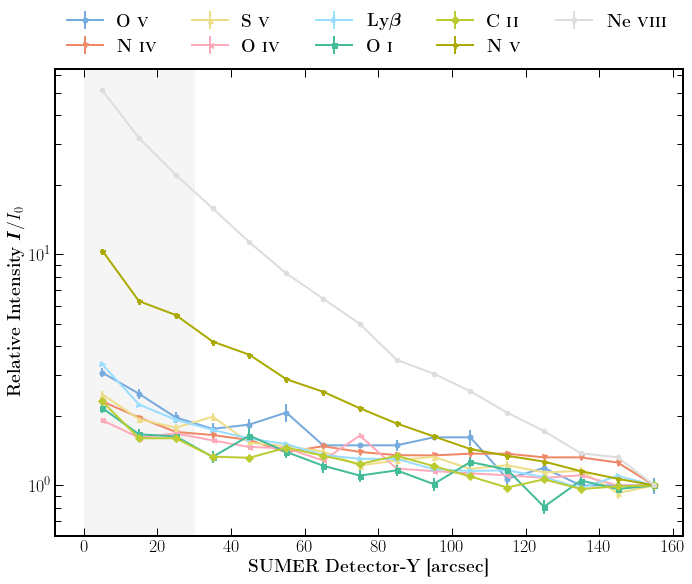

In [38]:
fig, ax = plt.subplots(figsize=(9.5,8),constrained_layout=True)

OV_760_norm, OV_760_norm_err = normalize_int_err(OV_760_fit_model.int_total_fit[:,0],
                                OV_760_fit_model.int_total_err[:,0])

NIV_765_norm, NIV_765_norm_err = normalize_int_err(NIV_765_fit_model.int_total_fit[:,0],
                                NIV_765_fit_model.int_total_err[:,0])

SV_786_norm, SV_786_norm_err = normalize_int_err(SV_786_fit_model.int_total_fit[:,0],
                                SV_786_fit_model.int_total_err[:,0])

OIV_787_norm, OIV_787_norm_err = normalize_int_err(OIV_787_fit_model.int_total_fit[:,0],
                                OIV_787_fit_model.int_total_err[:,0])

LyBeta_norm, LyBeta_norm_err = normalize_int_err(Lybeta_fit_model.int_total_fit[:,0],
                                Lybeta_fit_model.int_total_err[:,0])

OI_1027_norm, OI_1027_norm_err = normalize_int_err(OI_1027_fit_model.int_total_fit[:,0],
                                OI_1027_fit_model.int_total_err[:,0])

CII_1036_norm, CII_1036_norm_err = normalize_int_err(CII_1036_fit_model.int_total_fit[:,0],
                                CII_1036_fit_model.int_total_err[:,0])

NV_1238_norm, NV_1238_norm_err = normalize_int_err(NV_1238_fit_model.int_total_fit[:,0],
                                NV_1238_fit_model.int_total_err[:,0])

NeVIII_770_norm, NeVIII_770_norm_err = normalize_int_err(NeVIII_770_fit_model.int_total_fit[:,0],
                                NeVIII_770_fit_model.int_total_err[:,0])

ax.errorbar(np.arange(155,-1,-10), OV_760_norm, OV_760_norm_err,label=r"\textbf{O \textsc{v}}",
                                    color="#77AADD",lw=2,marker="o",markersize=5)
ax.errorbar(np.arange(155,-1,-10), NIV_765_norm, NIV_765_norm_err,label=r"\textbf{N \textsc{iv}}",
                                    color="#EE8866",lw=2,marker="v",markersize=5)
ax.errorbar(np.arange(155,-1,-10), SV_786_norm, SV_786_norm_err,label=r"\textbf{S \textsc{v}}",
                                    color="#EEDD88",lw=2,marker="^",markersize=5)
ax.errorbar(np.arange(155,-1,-10), OIV_787_norm, OIV_787_norm_err,label=r"\textbf{O \textsc{iv}}",
                                    color="#FFAABB",lw=2,marker="<",markersize=5)
ax.errorbar(np.arange(155,-1,-10), LyBeta_norm, LyBeta_norm_err,label=r"\textbf{Ly}$\boldsymbol\beta$",
                                    color="#99DDFF",lw=2,marker=">",markersize=5)
ax.errorbar(np.arange(155,-1,-10), OI_1027_norm, OI_1027_norm_err,label=r"\textbf{O \textsc{i}}",
                                    color="#44BB99",lw=2,marker="s",markersize=5)
ax.errorbar(np.arange(155,-1,-10), CII_1036_norm, CII_1036_norm_err,label=r"\textbf{C \textsc{ii}}",
                                    color="#BBCC33",lw=2,marker="D",markersize=5)
ax.errorbar(np.arange(155,-1,-10), NV_1238_norm, NV_1238_norm_err,label=r"\textbf{N \textsc{v}}",
                                    color="#AAAA00",lw=2,marker="P",markersize=5)
ax.errorbar(np.arange(155,-1,-10), NeVIII_770_norm, NeVIII_770_norm_err,label=r"\textbf{Ne \textsc{viii}}",
                                    color="#DDDDDD",lw=2,marker="H",markersize=5)

ax.axvspan(0,30,color="#F5F5F5",zorder=0)

ax.set_yscale("log")
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
ax.tick_params(which="major",length=8)
ax.tick_params(which="minor",length=6)
ax.set_xlabel(r"\textbf{SUMER Detector-Y [arcsec]}",fontsize=18)
ax.set_ylabel(r"\textbf{Relative Intensity} $\boldsymbol I/I_0$",fontsize=18)
ax.legend(ncol=5,fontsize=18,frameon=False,bbox_to_anchor=(0.,1.05,1,.102),)
plt.savefig(fname="../../figs/ms/SUMER_stray_height.pdf",format="pdf",bbox_inches="tight")